In [1]:
!pip install tensorflow_datasets

Using the IMDB Dataset
Step 1: Load the Dataset

In [3]:
import tensorflow_datasets as tfds

# Load the IMDB dataset
dataset, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Split dataset into training and test sets
train_data, test_data = dataset["train"], dataset["test"]

# Explore dataset information
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Hp\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_

Step 2: Preprocess the Data
The IMDB dataset contains raw text, so you need to tokenize and pad sequences

In [5]:
import numpy as np
import tensorflow as tf  # This ensures TensorFlow is properly imported
import tensorflow_datasets as tfds  # For loading the IMDB dataset

In [6]:
# Tokenizer hyperparameters
max_words = 10000  # Vocabulary size
max_len = 256  # Max sequence length

# Initialize tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")

# Fit tokenizer on the training data
train_sentences = []
train_labels = []
for text, label in train_data:
    train_sentences.append(text.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

tokenizer.fit_on_texts(train_sentences)

# Convert sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len, padding='post')

# Process test data similarly
test_sentences = []
test_labels = []
for text, label in test_data:
    test_sentences.append(text.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len, padding='post')

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

Step 3: Adjust the Model Hyperparameters
Update the embedding dimensions and input length in the model architecture to match the dataset.

In [8]:
# Import necessary components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Step 4: Train the Model
Train the model on the IMDB dataset.



In [10]:
# Define the model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_padded, train_labels,
    validation_data=(test_padded, test_labels),
    epochs=5,  # Reduce epochs for demonstration purposes
    batch_size=64,
    verbose=1
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 156s 376ms/step - accuracy: 0.6447 - loss: 0.5968 - val_accuracy: 0.8305 - val_loss: 0.4390
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 387ms/step - accuracy: 0.8257 - loss: 0.4049 - val_accuracy: 0.8592 - val_loss: 0.3380
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 375ms/step - accuracy: 0.9117 - loss: 0.2382 - val_accuracy: 0.8377 - val_loss: 0.3942
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 146s 374ms/step - accuracy: 0.9369 - loss: 0.1812 - val_accuracy: 0.8570 - val_loss: 0.3591
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 153s 390ms/step - accuracy: 0.9446 - loss: 0.1564 - val_accuracy: 0.8575 - val_loss: 0.4043


Step 5: Evaluate the Model
Evaluate the model using the test set.



In [12]:
loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4043, Test Accuracy: 0.8575


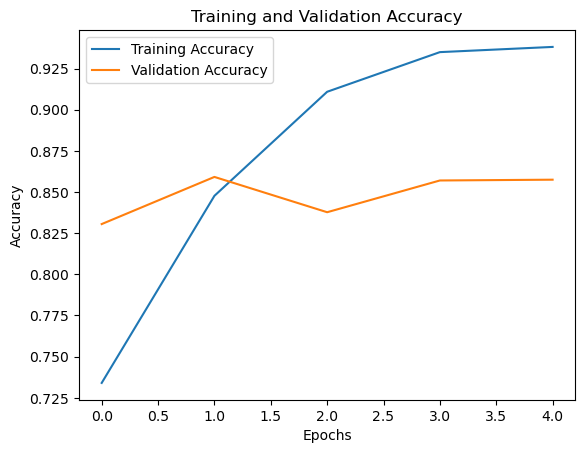

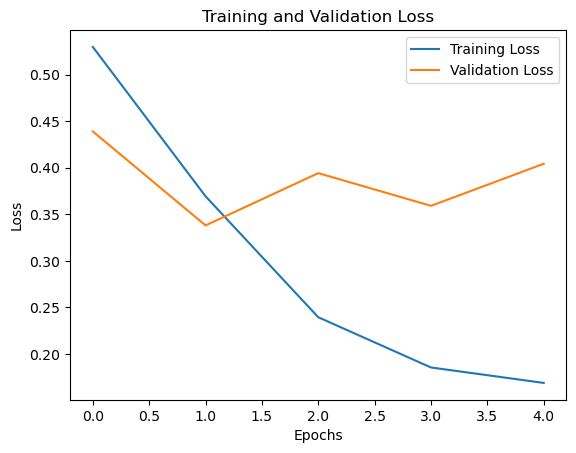

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()